In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

Задание 1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

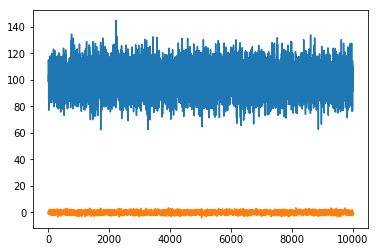

In [2]:
mu1, sigma1 = 100, 10
mu2, sigma2 = 0, 1

# сгенерируем 10000 значений
amount = 10000

norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
x = norm_rv1.rvs(size=amount)
plt.plot(x)

norm_rv2 = sts.norm(loc=mu2, scale=sigma2)
y = norm_rv2.rvs(size=amount)
plt.plot(y)

Задание 2. Нарисовать плотность распределения полученной выборки x.

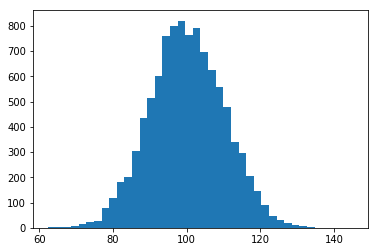

In [3]:
plt.hist(x,40)
plt.show()

Задание 3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.

(408.0314912466396, 1044.5130835590953, -31.37751495275105, 27.321499092142275)

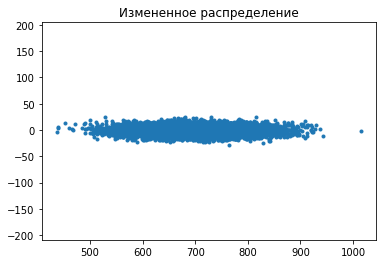

In [5]:
# Матрица масштабирования
n = 7
scale_matrix = np.array([[n, 0], [0, n]])

# Умножаем матрицу на исходную матрицу
x_new = np.vstack((x,y)).T
x_new = x_new.dot(scale_matrix)

#plt.scatter(x, y)
plt.scatter(x_new[:, 0], x_new[:, 1], marker='.')
plt.title('Измененное распределение')
plt.axis('equal')

Задание 4. Построить график зависимости (**корреляции**) x от y.

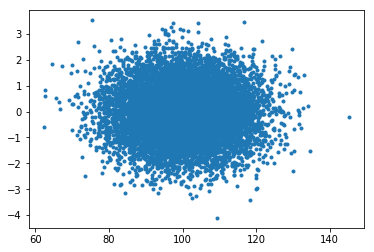

In [6]:
plt.scatter(x, y, marker='.')

Задание 5. Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.

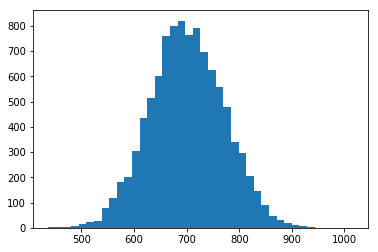

In [7]:
plt.hist(x_new[:, 0],40)
plt.show()

Изменились сами значения. Была использована матрица с диагональными 7-ками. В результате значение среднего значения было увеличено 7-кратно.

Задание 6. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

In [8]:
from scipy.stats import pearsonr

corr, _ = pearsonr(x, y)
print(corr)

-0.0034402783363076564


Значение коэффициента Пирсона равно практически 0. 
Положительное(отрицательное) значение коэффициента Пирсона означает, что связь между величинами прямо (обратно) пропорциональная (при изменении одного значения другое меняется соответствующим образом).

Задание 7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

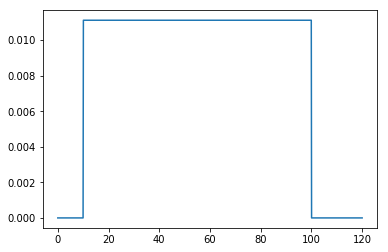

In [9]:
a, b = 10, 100

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)
x = np.linspace(0, 120, 1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

Равномерное распределение отличается от нормального 

Задание 8. Найти на графике примеры выброса. Что они означают? 

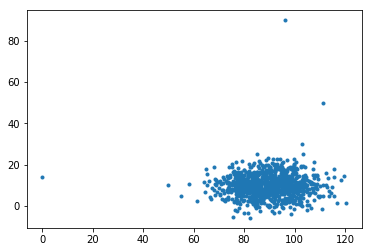

In [10]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
x[7] = 0
x[9] = 50
y[0] = 90
y[2] = 50
plt.scatter(x, y, marker='.')


Выбросы данных - это 4 точки, введенные от руки помимо основного распределения.
Выбросы могут означать ошибки в измерениях, аномальные значения. От них стоит избавляться. 

Задание 9. Найти корелляцию в следующих данных:

In [11]:
import io
import requests

In [12]:
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [14]:
#Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price.
#Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.
corr, _ = pearsonr(df['4046'], df['AveragePrice'])
print(corr)

-0.20831704848788477


Корреляция присутствует, требуется более детальная работа.

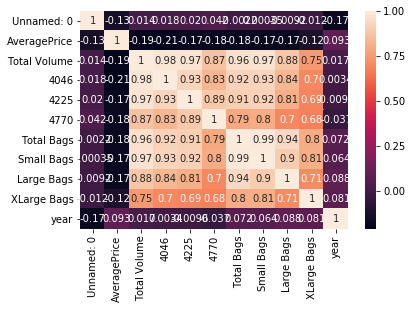

In [15]:
# приложение
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)